<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/image_inpaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

test = load_dataset("SIAKAM/inpainting_test")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/41 [00:00<?, ?it/s]

0_10655.png:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

0_10689.png:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

0_11491.png:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

0_2787.png:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

0_3012.png:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

0_12510.png:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

0_11920.png:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

0_7851.png:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

1_10689.png:   0%|          | 0.00/2.04M [00:00<?, ?B/s]

0_28588.png:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

0_17023.png:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

1_10655.png:   0%|          | 0.00/2.02M [00:00<?, ?B/s]

1_17023.png:   0%|          | 0.00/2.14M [00:00<?, ?B/s]

1_11491.png:   0%|          | 0.00/2.05M [00:00<?, ?B/s]

1_12510.png:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

1_11920.png:   0%|          | 0.00/2.03M [00:00<?, ?B/s]

1_28588.png:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

1_2787.png:   0%|          | 0.00/2.08M [00:00<?, ?B/s]

1_3012.png:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

2_10689.png:   0%|          | 0.00/1.33M [00:00<?, ?B/s]

2_10655.png:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

2_11491.png:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

2_12510.png:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

2_28588.png:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

2_2787.png:   0%|          | 0.00/1.47M [00:00<?, ?B/s]

1_7851.png:   0%|          | 0.00/2.00M [00:00<?, ?B/s]

2_17023.png:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

2_11920.png:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

2_7851.png:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

2_3012.png:   0%|          | 0.00/1.60M [00:00<?, ?B/s]

3_10655.png:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

3_11920.png:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

3_11491.png:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

3_10689.png:   0%|          | 0.00/1.33M [00:00<?, ?B/s]

3_17023.png:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

3_12510.png:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

3_2787.png:   0%|          | 0.00/1.47M [00:00<?, ?B/s]

test/metadata.jsonl:   0%|          | 0.00/200 [00:00<?, ?B/s]

train/metadata.jsonl:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

3_7851.png:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

3_28588.png:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

3_3012.png:   0%|          | 0.00/1.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/40 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4 [00:00<?, ? examples/s]

In [11]:
from datasets import load_dataset
import pandas as pd

# Load the CelebA-HQ dataset
ds = load_dataset("saitsharipov/CelebA-HQ")

# Print basic information about the dataset
print("Dataset structure:")
print(ds)

# Inspect the first few items in the training set
print("\nFirst few items in the training set:")
for i, item in enumerate(ds['train'].take(5)):
    print(f"Item {i}:")
    for key, value in item.items():
        if key == 'image':
            print(f"  {key}: <PIL.Image.Image image mode={value.mode} size={value.size}>")
        else:
            print(f"  {key}: {value}")
    print()

# Get all column names (attributes)
column_names = list(ds['train'].features.keys())
print("\nColumn names:")
print(column_names)

# Convert a small subset of the dataset to a pandas DataFrame for easier inspection
df = pd.DataFrame(ds['train'].select(range(100)))
print("\nDataFrame head:")
print(df.head())

# Print data types of columns
print("\nColumn data types:")
print(df.dtypes)

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 202599
    })
})

First few items in the training set:
Item 0:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 1:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 2:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 3:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 4:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>


Column names:
['image']

DataFrame head:
                                               image
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...

Column data types:
image    object
dtype: object


In [14]:
# Check the keys (splits) in the dataset
print(ds)

# Print first example to understand the structure
print(ds['train'][0])

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 202599
    })
})
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7C7A34524E50>}


In [15]:
# Check dataset size
print(f"Train set size: {len(ds['train'])}")
print(f"Validation set size: {len(ds['validation']) if 'validation' in ds else 'Not Available'}")
print(f"Test set size: {len(ds['test']) if 'test' in ds else 'Not Available'}")


Train set size: 202599
Validation set size: Not Available
Test set size: Not Available


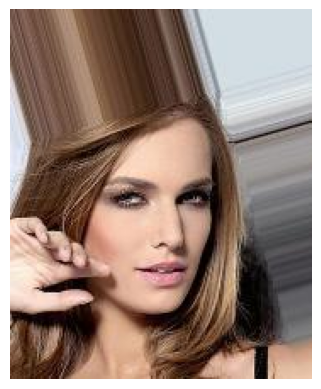

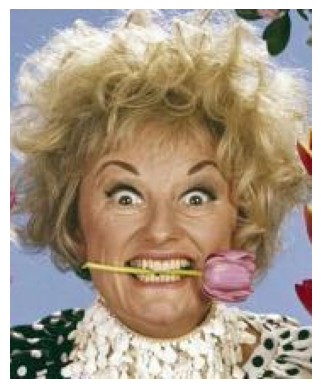

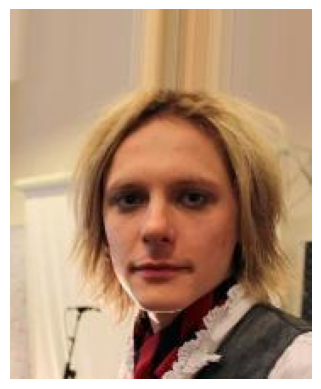

In [17]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def show_random_image(dataset):
    # Select a random index
    idx = random.randint(0, len(dataset) - 1)
    # Extract image and its corresponding label/metadata
    # The 'image' key already contains a PIL Image object
    img = dataset[idx]['image']
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show a few random images from the dataset
for _ in range(3):
    show_random_image(ds['train'])

In [19]:
# Check image size of the first image in the train set
image_size = ds['train'][0]['image'].size
print(f"Image size: {image_size}")

Image size: (178, 218)


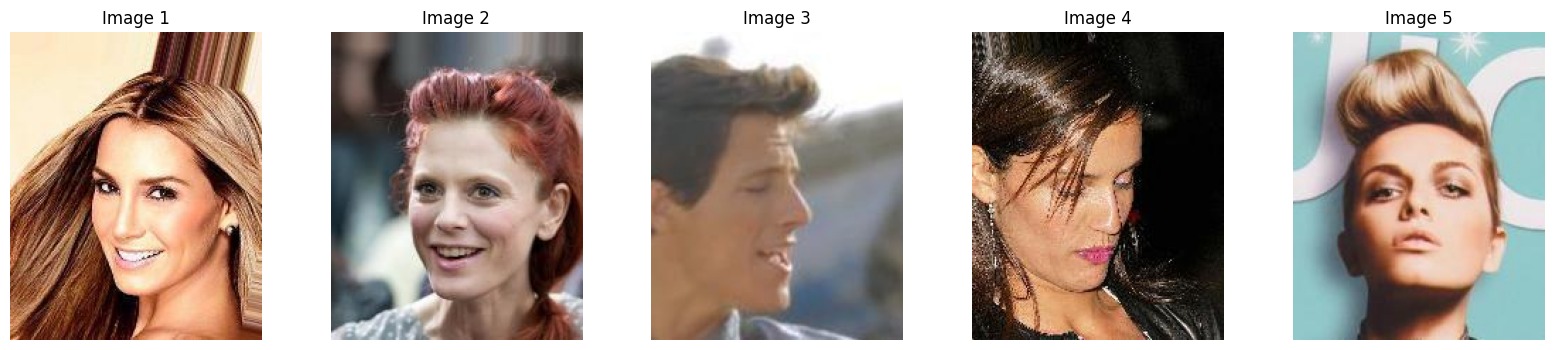

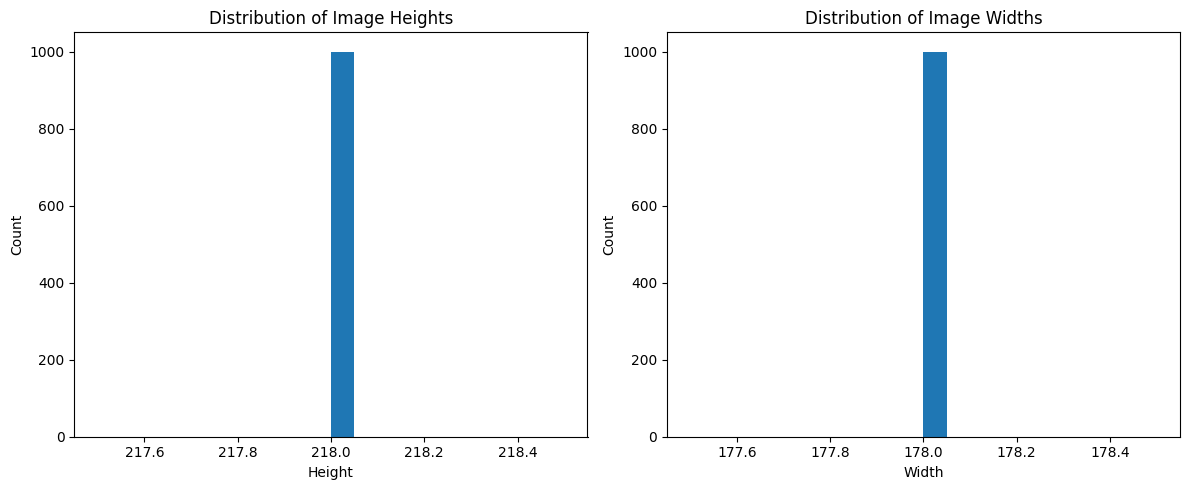

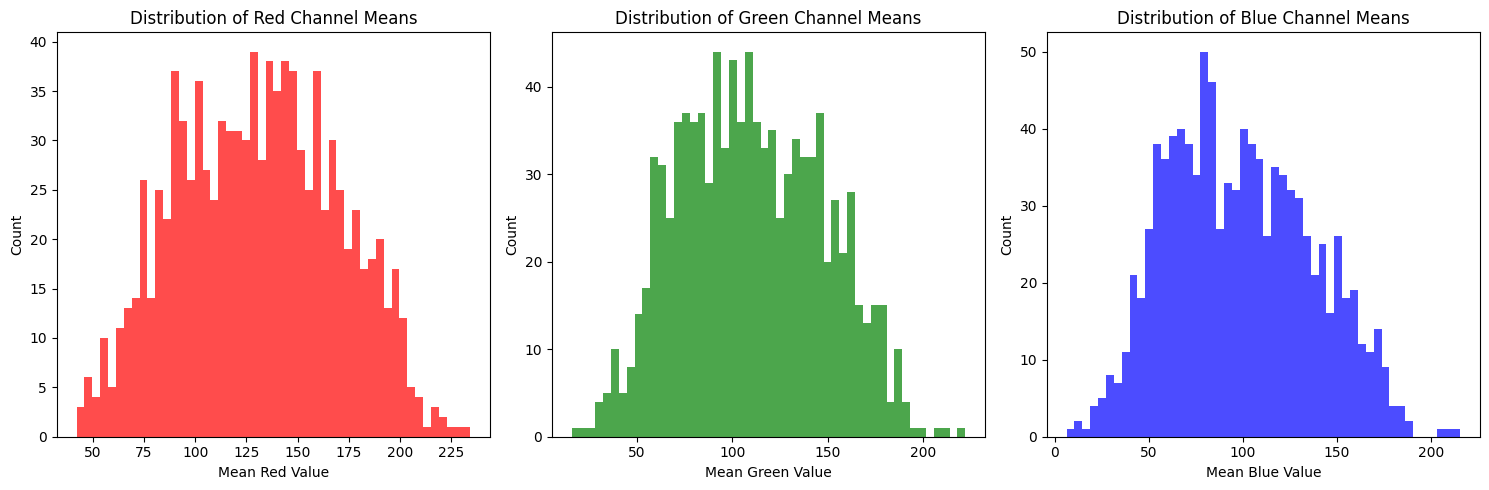

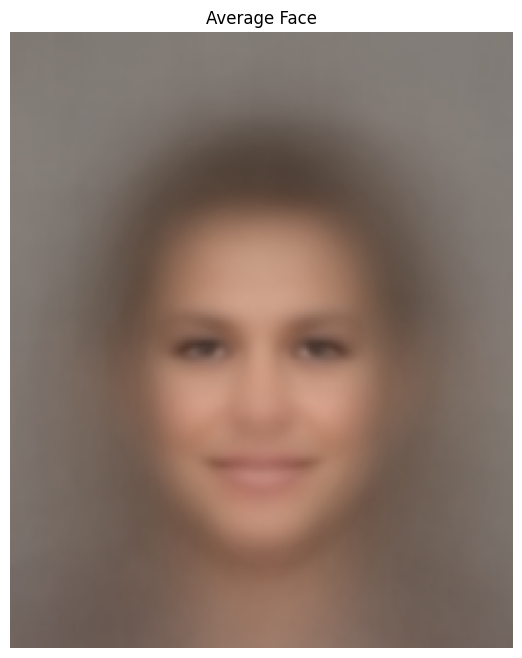

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

def display_sample_images(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    for i, ax in enumerate(axes):
        img = dataset['train'][i]['image']
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Image {i+1}")
    plt.show()

def analyze_image_dimensions(dataset, num_samples=1000):
    heights = []
    widths = []
    for i in range(num_samples):
        img = dataset['train'][i]['image']
        heights.append(img.height)
        widths.append(img.width)

    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.hist(heights, bins=20)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height')
    plt.ylabel('Count')

    plt.subplot(122)
    plt.hist(widths, bins=20)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

def analyze_color_distribution(dataset, num_samples=1000):
    r_means, g_means, b_means = [], [], []
    for i in range(num_samples):
        img = np.array(dataset['train'][i]['image'])
        r_means.append(np.mean(img[:,:,0]))
        g_means.append(np.mean(img[:,:,1]))
        b_means.append(np.mean(img[:,:,2]))

    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.hist(r_means, bins=50, color='red', alpha=0.7)
    plt.title('Distribution of Red Channel Means')
    plt.xlabel('Mean Red Value')
    plt.ylabel('Count')

    plt.subplot(132)
    plt.hist(g_means, bins=50, color='green', alpha=0.7)
    plt.title('Distribution of Green Channel Means')
    plt.xlabel('Mean Green Value')
    plt.ylabel('Count')

    plt.subplot(133)
    plt.hist(b_means, bins=50, color='blue', alpha=0.7)
    plt.title('Distribution of Blue Channel Means')
    plt.xlabel('Mean Blue Value')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

def create_average_face(dataset, num_samples=1000):
    first_image = np.array(dataset['train'][0]['image'])
    avg_face = np.zeros_like(first_image, dtype=np.float64)

    for i in range(num_samples):
        img = np.array(dataset['train'][i]['image'])
        avg_face += img

    avg_face /= num_samples
    avg_face = avg_face.astype(np.uint8)

    plt.figure(figsize=(8, 8))
    plt.imshow(avg_face)
    plt.title('Average Face')
    plt.axis('off')
    plt.show()

# Run the analysis functions
display_sample_images(ds)
analyze_image_dimensions(ds)
analyze_color_distribution(ds)
create_average_face(ds)